UnitedStates_COVID_19_dataset

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.



In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('usa_covid.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [4]:
#move the target data to the end of the dataframe 
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

df=ToTheEnd(df,'Confirmed')

In [5]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate', 'Confirmed'],
      dtype='object')

In [6]:
#checking the datatypes
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
Confirmed                 int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Deaths                58 non-null     int64  
 6   Recovered             42 non-null     float64
 7   Active                58 non-null     float64
 8   FIPS                  58 non-null     int64  
 9   Incident_Rate         56 non-null     float64
 10  People_Tested         56 non-null     float64
 11  People_Hospitalized   33 non-null     float64
 12  Mortality_Rate        57 non-null     float64
 13  UID                   58 non-null     int64  
 14  ISO3                  58 non-null     object 
 15  Testing_Rate          56 

In [8]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
Confirmed                0
dtype: int64

In [9]:
df.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
Confirmed                0
dtype: int64

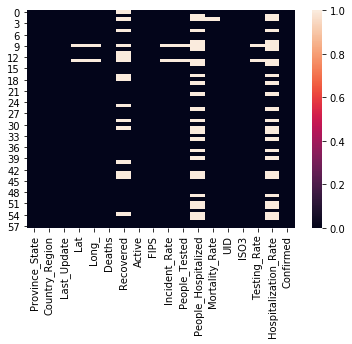

In [10]:
sns.heatmap(df.isnull())


There are missing values in the columns Lat,Long,recovered, hospitalised, hospitalised rate, people tested, testing rate, incident rate and mortality rate

In [11]:
#Lets the check the unique value and its counts
for i in df.columns:
    print(df[i].value_counts())
    print("")

Georgia                     1
District of Columbia        1
Hawaii                      1
Iowa                        1
Ohio                        1
Indiana                     1
Virginia                    1
New York                    1
Mississippi                 1
Maryland                    1
Missouri                    1
Alabama                     1
North Dakota                1
Wyoming                     1
Massachusetts               1
Washington                  1
New Jersey                  1
Virgin Islands              1
Texas                       1
West Virginia               1
Minnesota                   1
Kentucky                    1
Wisconsin                   1
Vermont                     1
Diamond Princess            1
Maine                       1
New Hampshire               1
Alaska                      1
Oklahoma                    1
Florida                     1
Pennsylvania                1
California                  1
Michigan                    1
Nebraska  

Province/State wise details of longtitude, latitude, confirmed cases, deaths, recovered, active cases, people tested, people hospitalised, testing rate, mortality rates, hospitalisation rate etc are provided. UID and FIPS are unique to each row.

In [12]:
df.describe()

,Lat,Long_,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,Confirmed
count,56.000000,56.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000,58.000000
mean,36.840089,-85.206614,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541,26756.086207
std,10.887035,49.754449,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403,52562.031122
min,-14.271000,-170.132000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043,0.000000
25%,34.594600,-101.165775,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000,2596.000000
50%,39.061850,-87.944200,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326,10148.500000
75%,42.361650,-76.970625,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649,29395.500000
max,61.370700,145.673900,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438,354370.000000


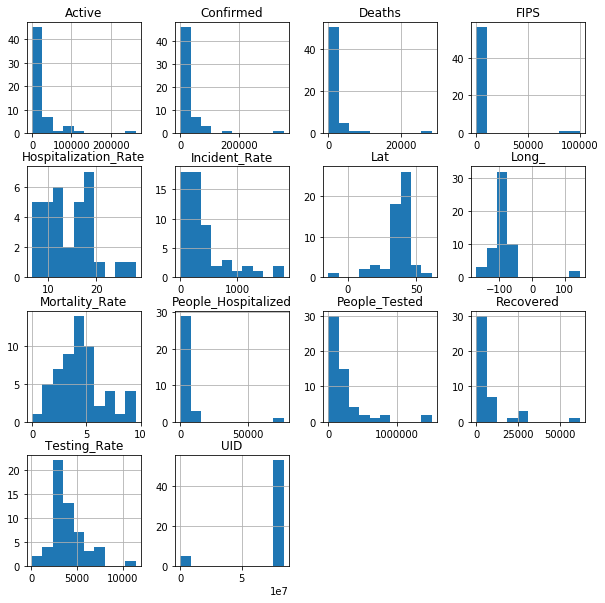

In [13]:
df.hist(figsize=(10,10))
plt.show()

In [14]:
df.skew()

Lat                    -2.213092
Long_                   3.509241
Deaths                  5.489201
Recovered               3.136333
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.955650
People_Tested           2.783163
People_Hospitalized     5.290187
Mortality_Rate          0.492052
UID                    -3.027480
Testing_Rate            1.291806
Hospitalization_Rate    0.667943
Confirmed               4.708614
dtype: float64

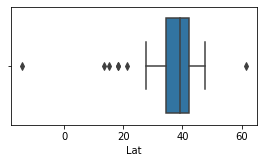

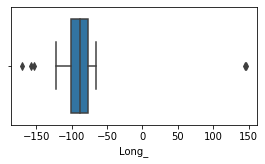

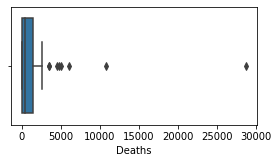

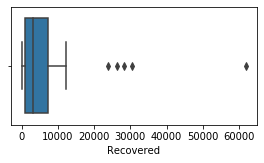

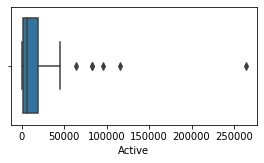

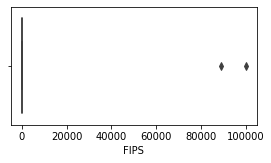

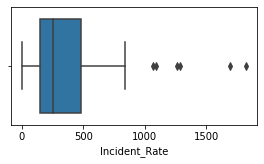

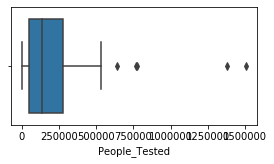

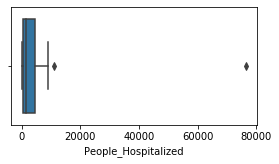

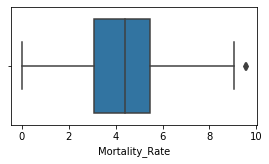

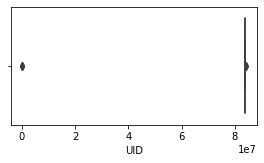

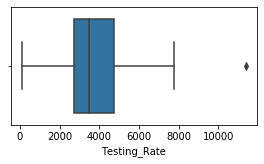

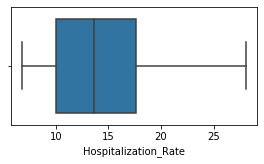

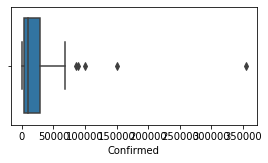

In [15]:
col_list=df.columns.values
for i in range(0,len(col_list)):
    if df[col_list[i]].dtypes!='O':
        plt.figure(figsize=(15,10))
        plt.subplot(4,3,2)
        sns.boxplot(df[col_list[i]])
        plt.show()

In [16]:
#There are outliers in the data which needs to be treated.

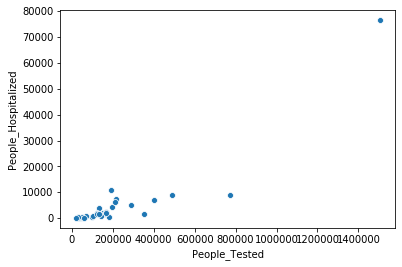

In [17]:
sns.scatterplot(x='People_Tested',y='People_Hospitalized',data=df)

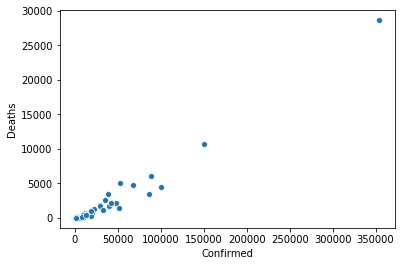

In [18]:
sns.scatterplot(x='Confirmed',y='Deaths',data=df)

In [19]:
#The above graphs show how the some province have a comparatively very higher confirmed and death cases when compared to others.


In [20]:
sortedbyactive=df.sort_values(by=['Confirmed','Active'],ascending=False)
sortedbyactive

,Province_State,Country_Region,Last_Update,Lat,Long_,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,28636,61886.0,263848.0,36,1821.620216,1505836.0,76410.0,8.080819,84000036,USA,7740.670204,21.562209,354370
34,New Jersey,US,2020-05-21 02:32:54,40.2989,-74.5210,10749,23945.0,116082.0,34,1697.509285,531343.0,NaN,7.129119,84000034,USA,5982.117023,NaN,150776
17,Illinois,US,2020-05-21 02:32:54,40.3495,-88.9861,4525,NaN,95893.0,17,792.451219,642713.0,NaN,4.506164,84000017,USA,5071.986102,NaN,100418
25,Massachusetts,US,2020-05-21 02:32:54,42.2302,-71.5301,6066,NaN,82904.0,25,1290.822797,489953.0,8897.0,6.818029,84000025,USA,7108.491647,10.000000,88970
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN,85997
43,Pennsylvania,US,2020-05-21 02:32:54,40.5908,-77.2098,4770,NaN,63356.0,42,532.151684,349700.0,NaN,7.001732,84000042,USA,2731.606784,NaN,68126
26,Michigan,US,2020-05-21 02:32:54,43.3266,-84.5361,5060,28234.0,19715.0,26,530.787614,437072.0,NaN,9.545549,84000026,USA,4376.471997,NaN,53009
49,Texas,US,2020-05-21 02:32:54,31.0545,-97.5635,1426,30341.0,19906.0,48,178.208070,770241.0,NaN,2.759662,84000048,USA,2656.380746,NaN,51673
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,2096,NaN,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911,47471
24,Maryland,US,2020-05-21 02:32:54,39.0639,-76.8021,2123,2993.0,37207.0,24,700.053592,215330.0,7393.0,5.016185,84000024,USA,3561.716796,17.468043,42323


Observations:

The highest confirmed cases is found in the province New York with 354,370 cases, 28636 deaths with mortality rate at 8%.
There has been no confirmed cases found in American Samoa as on date.

In [21]:
sortedbymortality=df.sort_values(by=['Mortality_Rate'],ascending=False)
sortedbymortality

,Province_State,Country_Region,Last_Update,Lat,Long_,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed
26,Michigan,US,2020-05-21 02:32:54,43.3266,-84.5361,5060,28234.0,19715.0,26,530.787614,437072.0,NaN,9.545549,84000026,USA,4376.471997,NaN,53009
39,Northern Mariana Islands,US,2020-05-21 02:32:54,15.0979,145.6739,2,13.0,6.0,69,38.082112,3817.0,NaN,9.523810,580,MNP,6921.877267,NaN,21
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438,39017
52,Virgin Islands,US,2020-05-21 02:32:54,18.3358,-64.8963,6,61.0,2.0,78,64.324869,1383.0,NaN,8.695652,850,VIR,1289.294104,NaN,69
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,28636,61886.0,263848.0,36,1821.620216,1505836.0,76410.0,8.080819,84000036,USA,7740.670204,21.562209,354370
22,Louisiana,US,2020-05-21 02:32:54,31.1695,-91.8678,2608,26249.0,6459.0,22,759.680898,285970.0,NaN,7.384755,84000022,USA,6151.487891,NaN,35316
34,New Jersey,US,2020-05-21 02:32:54,40.2989,-74.5210,10749,23945.0,116082.0,34,1697.509285,531343.0,NaN,7.129119,84000034,USA,5982.117023,NaN,150776
43,Pennsylvania,US,2020-05-21 02:32:54,40.5908,-77.2098,4770,NaN,63356.0,42,532.151684,349700.0,NaN,7.001732,84000042,USA,2731.606784,NaN,68126
25,Massachusetts,US,2020-05-21 02:32:54,42.2302,-71.5301,6066,NaN,82904.0,25,1290.822797,489953.0,8897.0,6.818029,84000025,USA,7108.491647,10.000000,88970
18,Indiana,US,2020-05-21 02:32:54,39.8494,-86.2583,1864,NaN,27410.0,18,434.834339,195738.0,4389.0,6.367425,84000018,USA,2907.481174,14.992826,29274


In [22]:
average_mortality_rate=df['Mortality_Rate'].mean()
average_mortality_rate

4.458247989218647

Observations:

As per mortality rate, Michigan and Northern Mariana Islands have highest mortality rate around 9.5 whereas the average mortality rate is at 4.45.
Provinces like Tennesse, Wyoming, Nebraska, Utah and South Dakota have low mortality rate which is less than 2.

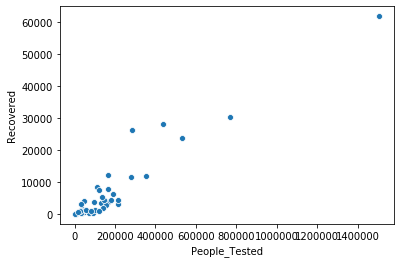

In [23]:
sns.scatterplot(x='People_Tested',y='Recovered',data=df)

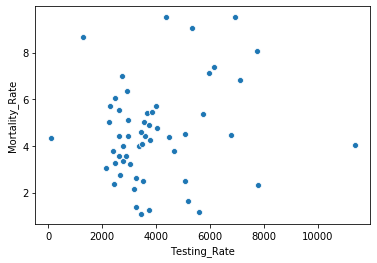

In [24]:
sns.scatterplot(x='Testing_Rate',y='Mortality_Rate',data=df)

Observations

People Tested and Recovered show positive correlation.
testing rate and mortality rate doesnt show clear positive correlation

In [25]:
sortedbytesting=df.sort_values(by=['Testing_Rate'],ascending=False)
sortedbytesting

,Province_State,Country_Region,Last_Update,Lat,Long_,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed
45,Rhode Island,US,2020-05-21 02:32:54,41.6809,-71.5118,538,1030.0,11788.0,44,1260.760024,120528.0,1486.0,4.028152,84000044,USA,11377.424693,11.126086,13356
38,North Dakota,US,2020-05-21 02:32:54,47.5289,-99.7840,49,1302.0,744.0,38,274.912015,59200.0,142.0,2.338902,84000038,USA,7768.396797,6.778043,2095
36,New York,US,2020-05-21 02:32:54,42.1657,-74.9481,28636,61886.0,263848.0,36,1821.620216,1505836.0,76410.0,8.080819,84000036,USA,7740.670204,21.562209,354370
25,Massachusetts,US,2020-05-21 02:32:54,42.2302,-71.5301,6066,NaN,82904.0,25,1290.822797,489953.0,8897.0,6.818029,84000025,USA,7108.491647,10.000000,88970
39,Northern Mariana Islands,US,2020-05-21 02:32:54,15.0979,145.6739,2,13.0,6.0,69,38.082112,3817.0,NaN,9.523810,580,MNP,6921.877267,NaN,21
35,New Mexico,US,2020-05-21 02:32:54,34.8405,-106.2485,283,1882.0,4152.0,35,301.264433,142246.0,1139.0,4.479975,84000035,USA,6783.862680,18.030711,6317
22,Louisiana,US,2020-05-21 02:32:54,31.1695,-91.8678,2608,26249.0,6459.0,22,759.680898,285970.0,NaN,7.384755,84000022,USA,6151.487891,NaN,35316
34,New Jersey,US,2020-05-21 02:32:54,40.2989,-74.5210,10749,23945.0,116082.0,34,1697.509285,531343.0,NaN,7.129119,84000034,USA,5982.117023,NaN,150776
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,407,1059.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN,7551
50,Utah,US,2020-05-21 02:32:54,40.1500,-111.8624,90,4423.0,3197.0,49,240.489738,179664.0,631.0,1.167315,84000049,USA,5604.065930,8.184176,7710


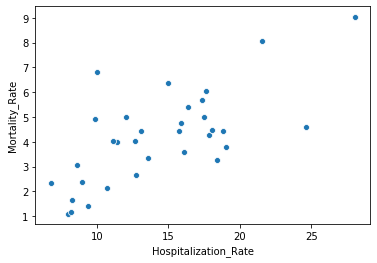

In [26]:
sns.scatterplot(x='Hospitalization_Rate',y='Mortality_Rate',data=df)
#Hospitalisation Rate and Mortality rate show a clear positive correlation. When there is higher hospitalisation, mortality rate is also hig

In [27]:
#Filling Lat and Long columns
df=df.drop(9,axis=0)
df=df.drop(13,axis=0)
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,13052
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,401
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN,0
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,14906
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,5003
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN,85997
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774,22797
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438,39017
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN,8194
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,407,1059.0,6085.0,11,1069.927127,40419.0,NaN,5.390015,84000011,USA,5727.106946,NaN,7551


In [28]:
#Checking if null values are filled
print(df['Lat'].isnull().sum())
print(df['Long_'].isnull().sum())

0
0


In [29]:
#Checking where incident rate is null
df.where(df['Incident_Rate'].isnull())


,Province_State,Country_Region,Last_Update,Lat,Long_,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The incident rate where it is null belongs to the two cruise ships. After doing some research online by referring sources like wikipedia, we get to know the Grand Princess had total 3533 people on board the ship, and 1103 were elected to be tested and out of which 103 tested positive.
Similary Diamond Princess 3711 people were on board, out of which over 700 were infected. However they belonged to different nationalities. It is mentioned that US government arranged for 328 peope to be departed to US by planes and 44 were undergoing treatment in Japan. So total no of US citizens in the cruise ship were 372. However, the dataset shows that total 49 people were infected which indicates 5 people were infected later after the airlift.

In [30]:
#Filling incident rate column

#calculating incident rate of Grand Princess. Since the cruise ship doesnot represent the population, we will calculate percentage here and not for 100000
print("incident rate of Grand Princess", 103/3533*100)
#calculating incident rate of Diamond Princess
print("incident rate of Diamond Princess", 49/372*100)
#Filling in the NaN values with the incident rates calculated
df.iloc[13,10]=2.91
df.iloc[9,10]=13.17


incident rate of Grand Princess 2.9153693744692895
incident rate of Diamond Princess 13.172043010752688


In [31]:
df['Incident_Rate']
#The values have been duly filled in the column

0      266.194321
1       54.815493
2        0.000000
3      204.788838
4      165.782801
5      217.646575
6      395.868121
7     1094.357902
8      841.476990
10    1069.927127
11     221.024217
12     374.864974
14      93.771502
15      45.413710
16     140.229930
17     792.451219
18     434.834339
19     495.076179
20     292.004226
21     182.802099
22     759.680898
23     135.320917
24     700.053592
25    1290.822797
26     530.787614
27     313.318316
28     402.096804
29     187.831124
30      44.723974
31     574.956266
32     239.857981
33     284.472215
34    1697.509285
35     301.264433
36    1821.620216
37     193.190672
38     274.912015
39      38.082112
40     251.824349
41     139.803906
42      90.119417
43     532.151684
44      97.702058
45    1260.760024
46     178.199838
47     472.159329
48     269.608008
49     178.208070
50     240.489738
51     151.284718
52      64.324869
53     385.541875
54     249.130224
55      87.437024
56     230.367575
57     135

In [32]:
#filling the People tested column

print(df.where(df['People_Tested'].isnull()))
# for Grand Princess it is mentioned in wikipedia that out of 3533, 1103 were elected to be tested.
#here as per the wikipedia information, we will have assume that all members in the Diamond Princess cruise ship were tested and fill in the values accordingly
# for Grand Princess it would be 1103
# for Diamond Princess it would be 372
df.iloc[13,11]=1103
df.iloc[9,11]=372

   Province_State Country_Region Last_Update  Lat  Long_  Deaths  Recovered  \
0             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
1             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
2             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
3             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
4             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
5             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
6             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
7             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
8             NaN            NaN         NaN  NaN    NaN     NaN        NaN   
10            NaN            NaN         NaN  NaN    NaN     NaN        NaN   
11            NaN            NaN         NaN  NaN    NaN     NaN        NaN   
12            NaN            NaN         NaN  NaN   

In [33]:
#checking if the values have been filled properly
df['People_Tested']

0      164450.00
1       37045.00
2         124.00
3      165435.00
4       96258.00
5     1380120.00
6      131837.00
7      190718.00
8       45412.00
10         13.17
11     771348.00
12     402940.00
14       4972.00
15          2.91
16      38567.00
17     642713.00
18     195738.00
19     110748.00
20      71203.00
21     153986.00
22     285970.00
23      37269.00
24     215330.00
25     489953.00
26     437072.00
27     167338.00
28     120680.00
29     161984.00
30      29726.00
31      72135.00
32      91171.00
33      50888.00
34     531343.00
35     142246.00
36    1505836.00
37     277603.00
38      59200.00
39       3817.00
40     289528.00
41     144371.00
42     102149.00
43     349700.00
44       2866.00
45     120528.00
46     135063.00
47      30389.00
48     354013.00
49     770241.00
50     179664.00
51      25058.00
52       1383.00
53     212626.00
54     293120.00
55      80641.00
56     167713.00
57      18840.00
Name: People_Tested, dtype: float64

In [34]:
df.where(df['Testing_Rate'].isnull())
#Since our assumption is that all in the cruise were tested, we will updated the testing rate to 100 representing 100 percentage for Diamond Princess.
# For Grand Princess it would be 1103/3533=31.22
#Since it is not a state or province, we will not change it to per 100000 metrics.
df.iloc[13,16]=31.22
df.iloc[9,16]=100

In [35]:
df.where(df['People_Hospitalized'].isnull())

,Province_State,Country_Region,Last_Update,Lat,Long_,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,10.0,352.0,39.0,2.0,54.815493,37045.0,NaN,2.493766,84000002.0,USA,5063.940017,NaN,401.0
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0.0,NaN,0.0,60.0,0.000000,124.0,NaN,NaN,16.0,ASM,222.857246,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,3497.0,NaN,82500.0,6.0,217.646575,1380120.0,NaN,4.066421,84000006.0,USA,3492.893832,NaN,85997.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,310.0,3965.0,3919.0,10.0,841.476990,45412.0,NaN,3.783256,84000010.0,USA,4663.552976,NaN,8194.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
Average_hosiptalised=(df['People_Hospitalized'].sum())*100/((df['Confirmed']).sum())
Average_hosiptalised

10.505181088366895

In [37]:
#We will use the the above value for finalising the people hospitalised. People hospitalised can be derived by multiplying the average hospitalised divided by 100
df['People_Hospitalized']=df['People_Hospitalized'].fillna(df['Confirmed']*Average_hosiptalised/100)

In [38]:
#The NaN values in Hospitalisation rate can be filled by Average_hospitalised
df['Hospitalization_Rate']=df['Hospitalization_Rate'].fillna(Average_hosiptalised)
df['Hospitalization_Rate']

0      11.438860
1      10.505181
2      10.505181
3      12.022005
4      10.693584
5      10.505181
6      17.348774
7      28.054438
8      10.505181
10    100.000000
11     18.819911
12     17.856335
14     10.505181
15     31.220000
16      8.579409
17     10.505181
18     14.992826
19     10.505181
20      8.933819
21     24.611240
22     10.505181
23     12.699285
24     17.468043
25     10.000000
26     10.505181
27     13.061686
28     15.885351
29     10.505181
30     13.598326
31     10.505181
32     10.505181
33      9.901758
34     10.505181
35     18.030711
36     21.562209
37     10.505181
38      6.778043
39     10.505181
40     17.658649
41     16.359364
42     19.021310
43     10.505181
44     10.505181
45     11.126086
46     15.738420
47      7.972229
48      8.228329
49     10.505181
50      8.184176
51     10.505181
52     10.505181
53     18.411936
54     10.505181
55     10.505181
56     16.111235
57      9.402795
Name: Hospitalization_Rate, dtype: float64

In [39]:
#Recovered column before filling with NaN values
df['Recovered']

0         NaN
1       352.0
2         NaN
3      3773.0
4      3852.0
5         NaN
6      3478.0
7      6264.0
8      3965.0
10     1059.0
11        NaN
12        NaN
14      125.0
15      578.0
16     1668.0
17        NaN
18        NaN
19     8362.0
20      473.0
21     2826.0
22    26249.0
23     1100.0
24     2993.0
25        NaN
26    28234.0
27    12227.0
28     7681.0
29        NaN
30      440.0
31        NaN
32      336.0
33     1275.0
34    23945.0
35     1882.0
36    61886.0
37    11637.0
38     1302.0
39       13.0
40        NaN
41     4266.0
42     1406.0
43        NaN
44        NaN
45     1030.0
46     5451.0
47     3023.0
48    11783.0
49    30341.0
50     4423.0
51      824.0
52       61.0
53     4523.0
54        NaN
55      950.0
56     7728.0
57      528.0
Name: Recovered, dtype: float64

In [40]:
df['Recovered']=df['Recovered'].fillna(df['Confirmed']-(df['Active']+df['Deaths']))
df['Recovered']
#We can observe that NaN values are replaced by zero which means that there are no recovery cases in that Province yet.

0         0.0
1       352.0
2         0.0
3      3773.0
4      3852.0
5         0.0
6      3478.0
7      6264.0
8      3965.0
10     1059.0
11        0.0
12        0.0
14      125.0
15      578.0
16     1668.0
17        0.0
18        0.0
19     8362.0
20      473.0
21     2826.0
22    26249.0
23     1100.0
24     2993.0
25        0.0
26    28234.0
27    12227.0
28     7681.0
29        0.0
30      440.0
31        0.0
32      336.0
33     1275.0
34    23945.0
35     1882.0
36    61886.0
37    11637.0
38     1302.0
39       13.0
40        0.0
41     4266.0
42     1406.0
43        0.0
44        0.0
45     1030.0
46     5451.0
47     3023.0
48    11783.0
49    30341.0
50     4423.0
51      824.0
52       61.0
53     4523.0
54        0.0
55      950.0
56     7728.0
57      528.0
Name: Recovered, dtype: float64

In [41]:
df['Mortality_Rate']=df['Mortality_Rate'].fillna('0') #Since the corresponding deaths and Active cases is zero. We are filling it by zero 
df['Mortality_Rate']

0     3.99939
1     2.49377
2           0
3      5.0114
4     2.13872
5     4.06642
6     5.69812
7     9.04478
8     3.78326
10    5.39001
11    4.41533
12    4.26371
14    3.24675
15    2.64386
16    3.07263
17    4.50616
18    6.36743
19    2.51601
20    2.37452
21    4.60389
22    7.38475
23    4.01319
24    5.01619
25    6.81803
26    9.54555
27    4.44822
28     4.7631
29     5.5517
30    3.34728
31    1.24078
32    5.10287
33     4.9121
34    7.12912
35    4.47997
36    8.08082
37    3.58306
38     2.3389
39    9.52381
40    6.05041
41    5.40492
42    3.78848
43    7.00173
44    4.36148
45    4.02815
46    4.43597
47    1.10127
48    1.65653
49    2.75966
50    1.16732
51    5.72034
52    8.69565
53    3.26668
54    5.46624
55    4.40332
56    3.58607
57    1.39771
Name: Mortality_Rate, dtype: object

In [42]:
df['People_Hospitalized']

0      1493.000000
1        42.125776
2         0.000000
3      1792.000000
4       535.000000
5      9034.140581
6      3955.000000
7     10946.000000
8       860.794538
10      372.000000
11     8934.000000
12     7107.000000
14       16.177979
15     1103.000000
16      215.000000
17    10549.092745
18     4389.000000
19     1640.909286
20      760.000000
21     2010.000000
22     3710.009753
23      231.000000
24     7393.000000
25     8897.000000
26     5568.691443
27     2308.000000
28     1901.000000
29     1211.037276
30       65.000000
31     1168.386241
32      776.122779
33      383.000000
34    15839.291838
35     1139.000000
36    76410.000000
37     2128.559792
38      142.000000
39        2.206088
40     5198.000000
41      905.000000
42      723.000000
43     7156.759668
44      301.078490
45     1486.000000
46     1444.000000
47      333.000000
48     1515.000000
49     5428.342224
50      631.000000
51       99.168909
52        7.248575
53     6059.000000
54     1992.

In [43]:
#Checking if all the missing values have been filled properly
df.isnull().sum()
#There are no missing values in the dataset

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
Confirmed               0
dtype: int64

In [44]:
#dropping the Country/Region (as only USA is the only value), Lat, Long, Province_State, FIPS and UID (as it is unique for each row) and doesnot contribute to the analysis or model much. 
df=df.drop(['Country_Region','Lat', 'Long_', 'Province_State','FIPS', 'UID', 'Last_Update'],axis=1)
df.head()

,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed
0,522,0.0,12530.0,266.194321,164450.0,1493.000000,3.99939,USA,3353.942386,11.438860,13052
1,10,352.0,39.0,54.815493,37045.0,42.125776,2.49377,USA,5063.940017,10.505181,401
2,0,0.0,0.0,0.000000,124.0,0.000000,0,ASM,222.857246,10.505181,0
3,747,3773.0,10386.0,204.788838,165435.0,1792.000000,5.0114,USA,2272.859351,12.022005,14906
4,107,3852.0,1044.0,165.782801,96258.0,535.000000,2.13872,USA,3189.670370,10.693584,5003


In [45]:
df.corr()

,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Testing_Rate,Hospitalization_Rate,Confirmed
Deaths,1.000000,0.780887,0.954203,0.712117,0.740945,0.973180,0.345441,0.043357,0.982295
Recovered,0.780887,1.000000,0.631090,0.521040,0.597466,0.761368,0.270200,-0.008239,0.754618
Active,0.954203,0.631090,1.000000,0.703931,0.828975,0.931971,0.322773,0.028667,0.985094
Incident_Rate,0.712117,0.521040,0.703931,1.000000,0.438439,0.636016,0.620621,0.251982,0.711776
People_Tested,0.740945,0.597466,0.828975,0.438439,1.000000,0.745249,0.228512,-0.047432,0.827419
People_Hospitalized,0.973180,0.761368,0.931971,0.636016,0.745249,1.000000,0.307790,0.070960,0.958872
Testing_Rate,0.345441,0.270200,0.322773,0.620621,0.228512,0.307790,1.000000,0.108001,0.334032
Hospitalization_Rate,0.043357,-0.008239,0.028667,0.251982,-0.047432,0.070960,0.108001,1.000000,0.024278
Confirmed,0.982295,0.754618,0.985094,0.711776,0.827419,0.958872,0.334032,0.024278,1.000000


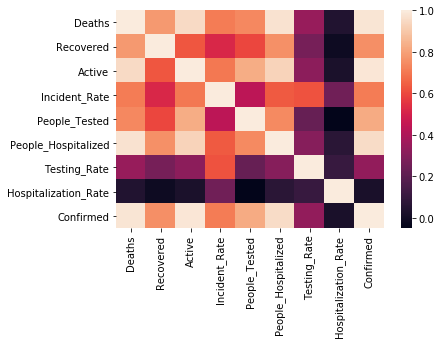

In [46]:
sns.heatmap(df.corr())
#confirmed, deaths, active and hospitalised values are positively correlated to each other

In [47]:
df.dtypes

Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate           object
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
Confirmed                 int64
dtype: object

In [48]:
#converting the data type object which is actually integer
df['Mortality_Rate']=df['Mortality_Rate'].astype(float)

In [49]:
#rechecking the datatypes
df.dtypes
#The datatypes have been corrected.

Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
Confirmed                 int64
dtype: object

In [50]:
#using labelencoder to convert the categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='O':
        df[i]=lb.fit_transform(df[i])

In [51]:
from scipy.stats import zscore
print("The datashape before removing outliers is ", df.shape)
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df.shape)

The datashape before removing outliers is  (56, 11)
The datashape after removing outliers is  (49, 11)


In [52]:
x=df.drop('Deaths',axis=1)
y=pd.DataFrame(df['Deaths'])
x.head()

,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate,Confirmed
0,0.0,12530.0,266.194321,164450.0,1493.000000,3.999387,4,3353.942386,11.438860,13052
1,352.0,39.0,54.815493,37045.0,42.125776,2.493766,4,5063.940017,10.505181,401
3,3773.0,10386.0,204.788838,165435.0,1792.000000,5.011405,4,2272.859351,12.022005,14906
4,3852.0,1044.0,165.782801,96258.0,535.000000,2.138717,4,3189.670370,10.693584,5003
6,3478.0,18020.0,395.868121,131837.0,3955.000000,5.698118,4,2289.339188,17.348774,22797


In [53]:
#checking the skewness in the data
x.skew()

Recovered               2.641452
Active                  2.426322
Incident_Rate           1.730962
People_Tested           1.750996
People_Hospitalized     1.383307
Mortality_Rate          0.652778
ISO3                   -3.648111
Testing_Rate            0.772266
Hospitalization_Rate    1.696100
Confirmed               1.875128
dtype: float64

In [54]:
#using sqrt function to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [55]:
#using log1p function to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [56]:
x.skew()
#the skewness has been removed to a certain extent

Recovered              -0.802499
Active                 -1.064564
Incident_Rate          -0.199293
People_Tested           0.510421
People_Hospitalized    -0.986744
Mortality_Rate         -0.007485
ISO3                   -3.648111
Testing_Rate           -0.557628
Hospitalization_Rate    0.921183
Confirmed              -1.127970
dtype: float64

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.791680,0.537883,0.460686,0.738616,0.465859,0.666667,0.613755,0.324297,0.748980
1,0.577590,0.226242,0.096785,0.217629,0.294237,0.259661,0.666667,0.783051,0.270097,0.328067
2,0.800248,0.772541,0.462794,0.462070,0.762371,0.582893,0.666667,0.482915,0.356193,0.765272
3,0.802222,0.540319,0.402755,0.352000,0.606235,0.202444,0.666667,0.595403,0.281367,0.631681
4,0.792497,0.828779,0.652580,0.412280,0.865919,0.655660,0.666667,0.485120,0.596816,0.817443


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score", r2score, "is achieved at r_state", r_state)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state
       

In [59]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The r2 score 0.3302045225763889 is achieved at r_state 42
The r2 score -0.8141065087786592 is achieved at r_state 43
The r2 score -3.5359757217337444 is achieved at r_state 44
The r2 score 0.309485206772794 is achieved at r_state 45
The r2 score -8.747754491735678 is achieved at r_state 46
The r2 score 0.7828627238837547 is achieved at r_state 47
The r2 score -0.13247508360295357 is achieved at r_state 48
The r2 score 0.37614619380779224 is achieved at r_state 49
The r2 score 0.623718636246708 is achieved at r_state 50
The r2 score 0.5417957909442384 is achieved at r_state 51
The r2 score -9.71548699910428 is achieved at r_state 52
The r2 score -2.9019014710787845 is achieved at r_state 53
The r2 score -4.387820833530044 is achieved at r_state 54
The r2 score 0.5908685226753749 is achieved at r_state 55
The r2 score 0.6927100863910904 is achieved at r_state 56
The r2 score -7.742997719098129 is achieved at r_state 57
The r2 score -0.6119942431152388 is achieved at r_state 58
The r2 sco

47

In [60]:
#finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=69,test_size=0.20)

In [61]:
#Lets check the cross val score for the same
from sklearn.model_selection import cross_val_score
lrcrossval=cross_val_score(lr,x,y,cv=5, scoring='r2').mean()
print("The cross val score of the linear regression is", lrcrossval)

The cross val score of the linear regression is -5.0335047225178995


In [62]:
#We need to check the other regression model and their results.
#using GridSearchCV to select best parameter for the models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 1}

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mae'}

In [64]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'linear'}

In [65]:

score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=1),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='linear')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
    print()
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The r2 score is  0.7634762683608577

The cross validation score is -5.0335047225178995

The mean absolute error is  703.6954457778997

The root mean square error is 26.527258542448365


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

The r2 score is  0.8709012066401335

The cross validation score is 0.6122244234405745

The mean absolute error is  391.3

The root mean square error is 19.781304304822775


DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      r

In [66]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.763476,-5.033505,703.695446,26.527259
1,KNeighborsRegressor,0.870901,0.612224,391.300000,19.781304
2,DecisionTreeRegressor,0.913423,-0.339112,275.200000,16.589153
3,SVR,-0.137311,-0.142832,1071.131094,32.728139


In [67]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x,train_y)
gdls.best_params_

{'alpha': 1}

In [68]:
#Lets check the r2 score for lasso
ls=Lasso(alpha=0.001)
max_r2_score(ls,x,y)

The r2 score 0.33143611201316026 is achieved at r_state 42
The r2 score -0.8109585109033532 is achieved at r_state 43
The r2 score -3.3667368788328407 is achieved at r_state 44
The r2 score 0.6523764890415986 is achieved at r_state 45
The r2 score -0.04019988280046305 is achieved at r_state 46
The r2 score 0.7828827218338614 is achieved at r_state 47
The r2 score 0.5353954321169514 is achieved at r_state 48
The r2 score 0.3777535495196709 is achieved at r_state 49
The r2 score 0.624127119922244 is achieved at r_state 50
The r2 score 0.542360432798224 is achieved at r_state 51
The r2 score -1.9754798967752385 is achieved at r_state 52
The r2 score -2.8968443124263574 is achieved at r_state 53
The r2 score -4.359151326864237 is achieved at r_state 54
The r2 score 0.590861946588812 is achieved at r_state 55
The r2 score 0.6927045356910226 is achieved at r_state 56
The r2 score 0.600524219554007 is achieved at r_state 57
The r2 score -0.9016208460406367 is achieved at r_state 58
The r2 sco

47

In [69]:
#Lets check the cross val score
cvscore=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)


The cross validation score is -2.257820282679709


In [70]:
#2. Ridge
#Lets check the best parameters for ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x,train_y)
grd.best_params_

{'alpha': 1}

In [71]:
#Lets check the r2 score for ridge
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The r2 score 0.6594100222936744 is achieved at r_state 42
The r2 score 0.7301213076291552 is achieved at r_state 43
The r2 score 0.778147950935072 is achieved at r_state 44
The r2 score 0.6338871449360892 is achieved at r_state 45
The r2 score 0.6229197580889725 is achieved at r_state 46
The r2 score 0.6854899385419959 is achieved at r_state 47
The r2 score 0.589698505825724 is achieved at r_state 48
The r2 score 0.6997470510842425 is achieved at r_state 49
The r2 score 0.649229944326696 is achieved at r_state 50
The r2 score 0.6500114646510367 is achieved at r_state 51
The r2 score -0.2307527220578236 is achieved at r_state 52
The r2 score 0.6165171439762432 is achieved at r_state 53
The r2 score 0.6039655923500957 is achieved at r_state 54
The r2 score 0.5175104388285641 is achieved at r_state 55
The r2 score 0.5496263416736705 is achieved at r_state 56
The r2 score 0.5527282283702897 is achieved at r_state 57
The r2 score 0.5250123953751002 is achieved at r_state 58
The r2 score 0.7

44

In [72]:
#Lets check the cross val score
cvscore=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.423068840052219


In [73]:
#Since the cross validation score is low, we can try to boost the model by using ensemble techniques

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [74]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'loss':('ls','lad','huber','quantile'), 'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500,1000), 'criterion':('friedman_mse', 'mse', 'mae')}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_ 

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'lad',
 'n_estimators': 100}

In [75]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(criterion='mae',n_estimators=1000,learning_rate=0.1,loss='lad')
max_r2_score(gb,x,y)

The r2 score 0.8988433702782822 is achieved at r_state 42
The r2 score 0.9039350102831311 is achieved at r_state 43
The r2 score 0.7503512549859832 is achieved at r_state 44
The r2 score 0.8876152986601624 is achieved at r_state 45
The r2 score 0.9257125252040568 is achieved at r_state 46
The r2 score 0.8938381066823242 is achieved at r_state 47
The r2 score 0.7739191405156693 is achieved at r_state 48
The r2 score 0.9361804105951498 is achieved at r_state 49
The r2 score 0.8819347255413759 is achieved at r_state 50
The r2 score 0.9180997850473026 is achieved at r_state 51
The r2 score 0.4752649478112947 is achieved at r_state 52
The r2 score 0.5058118720978152 is achieved at r_state 53
The r2 score 0.8624042206856274 is achieved at r_state 54
The r2 score 0.6392042085970722 is achieved at r_state 55
The r2 score 0.7416187260302041 is achieved at r_state 56
The r2 score 0.6850732775626776 is achieved at r_state 57
The r2 score 0.9687887600524822 is achieved at r_state 58
The r2 score 0

75

In [76]:
#Lets check the cross val score
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.6004698575612275


In [77]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1),'loss':('linear','square','exponential')}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.001, 'loss': 'square', 'n_estimators': 10}

In [78]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=50,learning_rate=0.001,loss='exponential')
max_r2_score(ad,x,y)

The r2 score 0.8928954567383335 is achieved at r_state 42
The r2 score 0.7807088235039126 is achieved at r_state 43
The r2 score -0.17042377357885652 is achieved at r_state 44
The r2 score 0.8779302583790388 is achieved at r_state 45
The r2 score 0.7629917451093502 is achieved at r_state 46
The r2 score 0.8937839164767892 is achieved at r_state 47
The r2 score 0.6932239370798228 is achieved at r_state 48
The r2 score 0.8587986913289974 is achieved at r_state 49
The r2 score 0.33203686392274645 is achieved at r_state 50
The r2 score 0.9121257229141267 is achieved at r_state 51
The r2 score -1.6759930488596977 is achieved at r_state 52
The r2 score 0.9399723230156629 is achieved at r_state 53
The r2 score 0.9787831250912193 is achieved at r_state 54
The r2 score 0.570112073298384 is achieved at r_state 55
The r2 score 0.40329064659307345 is achieved at r_state 56
The r2 score 0.5905054164800301 is achieved at r_state 57
The r2 score 0.7552855355137615 is achieved at r_state 58
The r2 sco

54

In [79]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.825,0.786,0.976,0.99],'Cross_val_score':[-1.06,0.316,0.53,-0.187]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.825,-1.060
1,Ridge,0.786,0.316
2,GradientBoostRegressor,0.976,0.530
3,AdaBoostRegressor,0.990,-0.187


In [80]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.763476,-5.033505,703.695446,26.527259
1,KNeighborsRegressor,0.870901,0.612224,391.300000,19.781304
2,DecisionTreeRegressor,0.913423,-0.339112,275.200000,16.589153
3,SVR,-0.137311,-0.142832,1071.131094,32.728139


In [81]:
#By analysing the results, we can finalise the GradientBoostRegressor as it is giving good r2 score and better cross val score
#Let us finalise the model
#Finalising the model
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=72,test_size=0.20)
gb=GradientBoostingRegressor(criterion='mae',n_estimators=1000,learning_rate=0.1,loss='huber')
gb.fit(train_x,train_y)
pred=gb.predict(test_x)
r2score=r2_score(test_y,pred)
cv=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)
pd.DataFrame(pred).to_csv("Project9_USA_COVID19.csv")

The accuracy score is 0.9719189609893552
The cross val score is 0.5684559498406975


In [82]:
#saving the model
from sklearn.externals import joblib
joblib.dump(ls,'Project9_USA_COVID19.pkl')

['Project9_USA_COVID19.pkl']